In [3]:
import sys
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(456)

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ChangePoint.ShiryaevRoberts_CPD import compute_SR_mean
from CondEnt.CondEnt_RFCDE import multivariate_EWS
from utils import plot_SR_synthetic_data


# Experiments

## Information transfer termination

In [4]:
# Generate synthetic data

X_train = pd.DataFrame()
X_train['X'] = 0
X_train['Y'] = np.random.exponential(3, 1000)
X_train['Z'] = np.random.gamma(3,1, 1000)


for i in range(1, len(X_train)):
    if i < 500:
        X_train['X'][i] = 0.5 * np.log(X_train['Y'][i-1]) + 0.2 * X_train['Z'][i-1] ** 2  + 0.3 * np.random.normal(0,1)
    else:
        X_train['X'][i] = 5 + 6 * np.random.normal(0, 1)

X_train = X_train.dropna()

# Define an EWS
EWS = multivariate_EWS(1)

# Define the width of sliding window
ww = 50

# Compute entropy with linear model (LR) without ranks
ent_res_lin = EWS.Est_Cond_Entropy_linear(X_train,
                                       'X',
                                      ['Y', 'Z'], 
                                      step = 1, 
                                      use_ranks=False,
                                      verbose = False, 
                                      bandwidth='auto', 
                                      n_grid=100, 
                                      n_trees=1000, 
                                      node_size=10, 
                                      window_size=ww, 
                                      n_basis=50, 
                                      fit_type='jointly')

# Compute entropy with linear model (LR) with ranks
ent_res_lin_r = EWS.Est_Cond_Entropy_linear(X_train,
                                       'X',
                                      ['Y', 'Z'], 
                                      step = 1, 
                                      use_ranks=True,
                                      verbose = False, 
                                      bandwidth='auto', 
                                      n_grid=100, 
                                      n_trees=1000, 
                                      node_size=10, 
                                      window_size=ww, 
                                      n_basis=50, 
                                      fit_type='jointly')

# Compute entropy with local linear forest (LLF) without ranks
ent_res_llf = EWS.Est_Cond_Entropy_LLF(X_train,
                                        'X',
                                        ['Y', 'Z'], 
                                        step = 1, 
                                        use_ranks=False,
                                        verbose = False, 
                                        bandwidth='auto', 
                                        n_grid=100, 
                                        n_trees_RFCDE=1000, 
                                        node_size=10, 
                                        window_size=ww, 
                                        n_basis=50, 
                                        fit_type='jointly',
                                        n_trees_LLF=1000,
                                        ll_split_weight_penalty=False,
                                        ll_split_lambda=0.2,
                                        ll_split_variables=None,
                                        ll_split_cutoff=None,
                                        equalize_cluster_weights=False,
                                        sample_fraction=0.5,
                                        min_node_size=2,
                                        honesty=True,
                                        honesty_fraction=0.15,
                                        honesty_prune_leaves=True,
                                        alpha=0.15,
                                        imbalance_penalty=0,
                                        ci_group_size=2,
                                        n_jobs=-1,
                                        seed=42,
                                        enable_tree_details=False)


# Compute entropy with local linear forest (LLF) with ranks
ent_res_llf_r = EWS.Est_Cond_Entropy_LLF(X_train,
                                        'X',
                                        ['Y', 'Z'], 
                                        step = 1, 
                                        use_ranks=True,
                                        verbose = False, 
                                        bandwidth='auto', 
                                        n_grid=100, 
                                        n_trees_RFCDE=1000, 
                                        node_size=10, 
                                        window_size=ww, 
                                        n_basis=50, 
                                        fit_type='jointly',
                                        n_trees_LLF=1000,
                                        ll_split_weight_penalty=False,
                                        ll_split_lambda=0.2,
                                        ll_split_variables=None,
                                        ll_split_cutoff=None,
                                        equalize_cluster_weights=False,
                                        sample_fraction=0.5,
                                        min_node_size=2,
                                        honesty=True,
                                        honesty_fraction=0.15,
                                        honesty_prune_leaves=True,
                                        alpha=0.15,
                                        imbalance_penalty=0,
                                        ci_group_size=2,
                                        n_jobs=-1,
                                        seed=42,
                                        enable_tree_details=False)


In [5]:
# Compute SR stat for linear model, no ranks
SR_stat_lin = compute_SR_mean(ent_res_lin,
                                mean_diff=.5,
                                max_stat=1e180,
                                alpha=0.5,
                                beta=0.1
                                )

# Compute SR stat for linear model, ranks
SR_stat_lin_r = compute_SR_mean(ent_res_lin_r,
                                mean_diff=0.13,
                                max_stat=1e180,
                                alpha=0.5,
                                beta=0.1
                                )

# Compute SR stat for linear model, no ranks
SR_stat_llf = compute_SR_mean(ent_res_llf,
                                mean_diff=.5,
                                max_stat=1e180,
                                alpha=0.5,
                                beta=0.1
                                )

# Compute SR stat for linear model, no ranks 
SR_stat_llf_r = compute_SR_mean(ent_res_llf_r,
                                mean_diff=0.13,
                                max_stat=1e180,
                                alpha=0.5,
                                beta=0.1
                                )

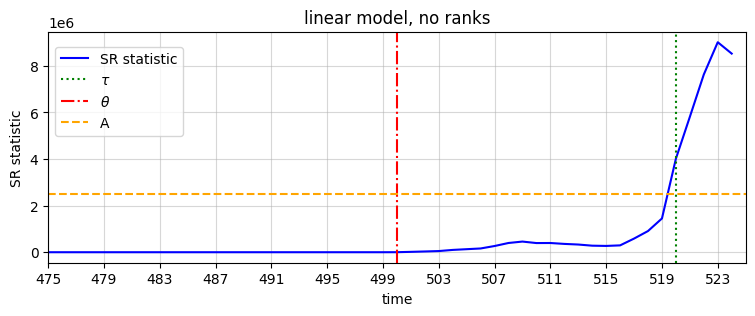

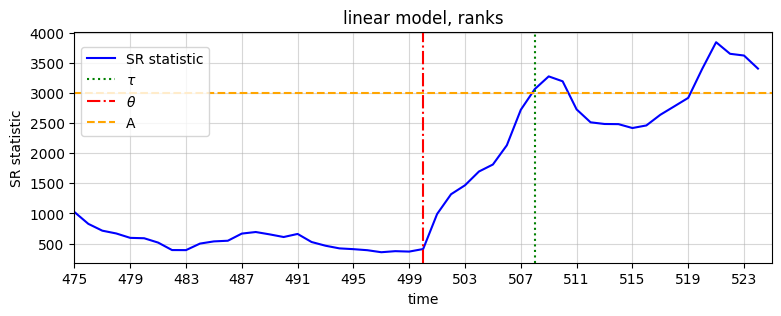

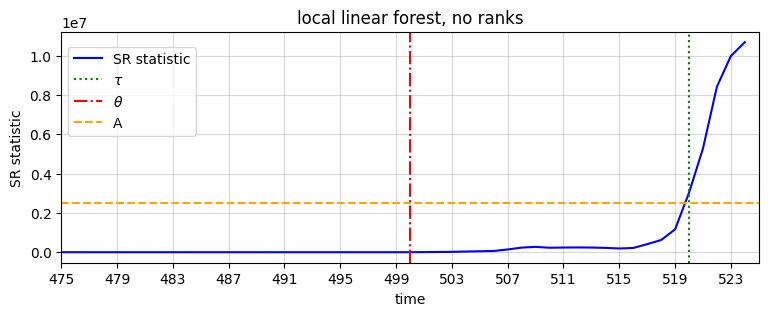

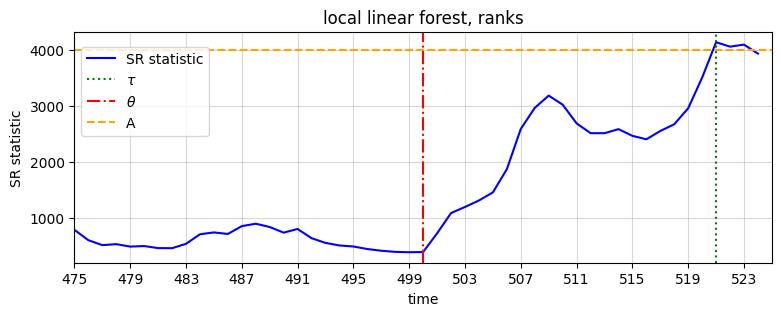

In [7]:
# Plot the anticipated results 
plot_SR_synthetic_data(SR_stat_lin, ww, 2.5e6, model_used='linear model', ranks_used = 'no ranks')
plot_SR_synthetic_data(SR_stat_lin_r, ww, 3e3, model_used='linear model', ranks_used = 'ranks')
plot_SR_synthetic_data(SR_stat_llf, ww, 2.5e6, model_used='local linear forest', ranks_used = 'no ranks')
plot_SR_synthetic_data(SR_stat_llf_r, ww, 4e3, model_used='local linear forest', ranks_used = 'ranks')

## Information transfer inversion

In [8]:
# Generate synthetic data

X_train = pd.DataFrame()
X_train['X'] = 0
X_train['Y'] = np.random.exponential(3, 1000)
X_train['Z'] = np.random.gamma(3,1, 1000)


for i in range(1, len(X_train)):
    if i < 500:
        X_train['X'][i] = 0.5 * np.log(X_train['Y'][i-1]) + 0.2 * X_train['Z'][i-1] ** 2 +  0.1 * np.random.normal(0,1)
    else:
        X_train['X'][i] = 5 + 3 * np.random.normal(0, 1)
        X_train['Y'][i] = 0.3 * X_train['X'][i-1]+ 0.1 * np.random.normal(0, 1)
        X_train['Z'][i] = 0.6 * X_train['X'][i-1] ** 2 + 0.1 * np.random.normal(0, 1)


X_train = X_train.dropna()

# Compute entropy with linear model (LR) without ranks
ent_res_lin = EWS.Est_Cond_Entropy_linear(X_train,
                                       'X',
                                      ['Y', 'Z'], 
                                      step = 1, 
                                      use_ranks=False,
                                      verbose = False, 
                                      bandwidth='auto', 
                                      n_grid=100, 
                                      n_trees=1000, 
                                      node_size=10, 
                                      window_size=ww, 
                                      n_basis=50, 
                                      fit_type='jointly')

# Compute entropy with linear model (LR) with ranks
ent_res_lin_r = EWS.Est_Cond_Entropy_linear(X_train,
                                       'X',
                                      ['Y', 'Z'], 
                                      step = 1, 
                                      use_ranks=True,
                                      verbose = False, 
                                      bandwidth='auto', 
                                      n_grid=100, 
                                      n_trees=1000, 
                                      node_size=10, 
                                      window_size=ww, 
                                      n_basis=50, 
                                      fit_type='jointly')

# Compute entropy with local linear forest (LLF) without ranks
ent_res_llf = EWS.Est_Cond_Entropy_LLF(X_train,
                                        'X',
                                        ['Y', 'Z'], 
                                        step = 1, 
                                        use_ranks=False,
                                        verbose = False, 
                                        bandwidth='auto', 
                                        n_grid=100, 
                                        n_trees_RFCDE=1000, 
                                        node_size=10, 
                                        window_size=ww, 
                                        n_basis=50, 
                                        fit_type='jointly',
                                        n_trees_LLF=1000,
                                        ll_split_weight_penalty=False,
                                        ll_split_lambda=0.2,
                                        ll_split_variables=None,
                                        ll_split_cutoff=None,
                                        equalize_cluster_weights=False,
                                        sample_fraction=0.5,
                                        min_node_size=2,
                                        honesty=True,
                                        honesty_fraction=0.05,
                                        honesty_prune_leaves=True,
                                        alpha=0.05,
                                        imbalance_penalty=0,
                                        ci_group_size=2,
                                        n_jobs=-1,
                                        seed=42,
                                        enable_tree_details=False)

# Compute entropy with local linear forest (LLF) with ranks
ent_res_llf_r = EWS.Est_Cond_Entropy_LLF(X_train,
                                        'X',
                                        ['Y', 'Z'], 
                                        step = 1, 
                                        use_ranks=True,
                                        verbose = False, 
                                        bandwidth='auto', 
                                        n_grid=100, 
                                        n_trees_RFCDE=1000, 
                                        node_size=10, 
                                        window_size=ww, 
                                        n_basis=50, 
                                        fit_type='jointly',
                                        n_trees_LLF=1000,
                                        ll_split_weight_penalty=False,
                                        ll_split_lambda=0.2,
                                        ll_split_variables=None,
                                        ll_split_cutoff=None,
                                        equalize_cluster_weights=False,
                                        sample_fraction=0.5,
                                        min_node_size=2,
                                        honesty=True,
                                        honesty_fraction=0.05,
                                        honesty_prune_leaves=True,
                                        alpha=0.05,
                                        imbalance_penalty=0,
                                        ci_group_size=2,
                                        n_jobs=-1,
                                        seed=42,
                                        enable_tree_details=False)

In [9]:
# Compute SR stat for linear model, no ranks
SR_stat_lin = compute_SR_mean(ent_res_lin,
                                mean_diff=0.3,
                                max_stat=1e180,
                                alpha=0.5,
                                beta=0.1
                                )

# Compute SR stat for linear model, ranks
SR_stat_lin_r = compute_SR_mean(ent_res_lin_r,
                                mean_diff=0.15,
                                max_stat=1e180,
                                alpha=0.5,
                                beta=0.1
                                )

# Compute SR stat for linear model, no ranks
SR_stat_llf = compute_SR_mean(ent_res_llf,
                                mean_diff=0.3,
                                max_stat=1e180,
                                alpha=0.5,
                                beta=0.1
                                )

# Compute SR stat for linear model, no ranks
SR_stat_llf_r = compute_SR_mean(ent_res_llf_r,
                                mean_diff=0.15,
                                max_stat=1e180,
                                alpha=0.5,
                                beta=0.1
                                )

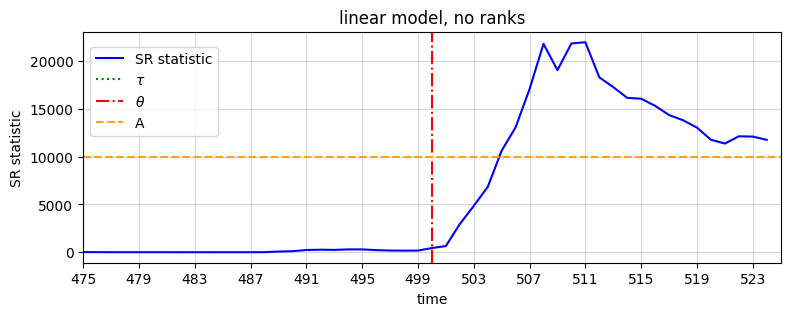

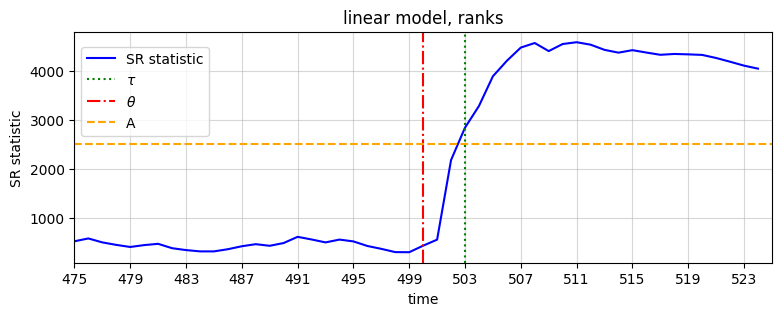

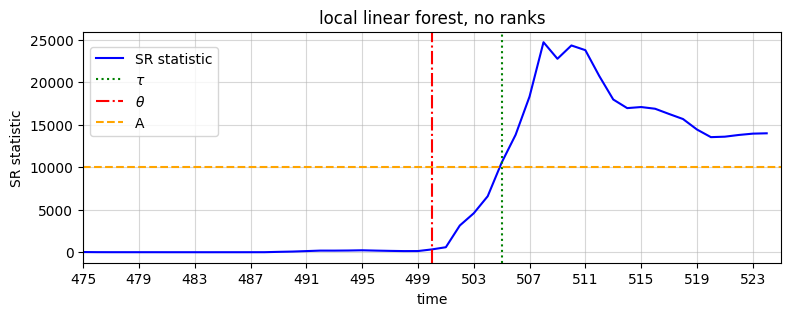

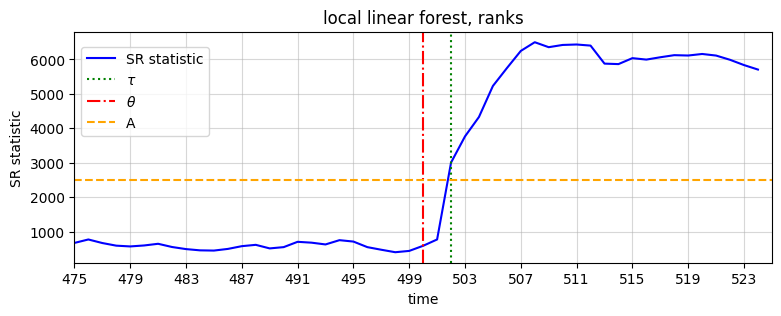

In [12]:
# Plot the anticipated results 
plot_SR_synthetic_data(SR_stat_lin, ww, 1e4, model_used='linear model', ranks_used = 'no ranks')
plot_SR_synthetic_data(SR_stat_lin_r, ww, 2.5e3, model_used='linear model', ranks_used = 'ranks')
plot_SR_synthetic_data(SR_stat_llf, ww, 1e4, model_used='local linear forest', ranks_used = 'no ranks')
plot_SR_synthetic_data(SR_stat_llf_r, ww, 2.5e3, model_used='local linear forest', ranks_used = 'ranks')